# Practice Project 7_Big Data Mart Sales Problem

# Big Data Mart Sales Problem is a regressio based problem statement to predict sales of products based on details of the predict from data from 2013. The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

# Importing Data From Github repository dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv

In [105]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [106]:
print('DataFrame View: ')
print('View 1: Head View: ', end='\n'*2)
print(data.head(), end='\n'*2)
print('View 2: Sample View: ', end='\n'*2)
print(data.sample(), end='\n'*2)
print('View 3: Tail View: ', end='\n'*2)
print(data.tail(), end='\n'*2)

DataFrame View: 
View 1: Head View: 

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                    

In [107]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [108]:
data.shape

(8523, 12)

In [109]:
type(data), type(data.columns)

(pandas.core.frame.DataFrame, pandas.core.indexes.base.Index)

In [110]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [111]:
data.isna().values.any()

True

# Observations:
1. There are 8523 rows and 12 columns.
2. There are 7 categorical columns and 5 continuous columns.
3. Information gain seems promising.
4. There are null and missing values in two colums, hence, I will fill those with mean of the data.

# Encoding Of Ordinal Data

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [113]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])
result

array([[1.560e+02, 1.000e+00, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [8.000e+00, 2.000e+00, 1.400e+01, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [6.620e+02, 1.000e+00, 1.000e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.357e+03, 1.000e+00, 8.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [6.810e+02, 2.000e+00, 1.300e+01, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [5.000e+01, 1.000e+00, 1.400e+01, ..., 2.000e+00, 0.000e+00,
        1.000e+00]])

In [114]:
len(result)

8523

In [115]:
len(data)

8523

In [116]:
encoded=data.select_dtypes(include = [object]).columns
encoded

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [117]:
encoded_data=pd.DataFrame(data=result, columns=[encoded+'_encoded'])
encoded_data

,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,156.0,1.0,4.0,9.0,1.0,0.0,1.0
1,8.0,2.0,14.0,3.0,1.0,2.0,2.0
2,662.0,1.0,10.0,9.0,1.0,0.0,1.0
3,1121.0,2.0,6.0,0.0,NaN,2.0,0.0
4,1297.0,1.0,9.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...
8518,370.0,1.0,13.0,1.0,0.0,2.0,1.0
8519,897.0,2.0,0.0,7.0,NaN,1.0,1.0
8520,1357.0,1.0,8.0,6.0,2.0,1.0,1.0
8521,681.0,2.0,13.0,3.0,1.0,2.0,2.0


In [118]:
new_data=pd.concat([data, encoded_data], axis=1, ignore_index=False)
new_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156.0,1.0,4.0,9.0,1.0,0.0,1.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.0,2.0,14.0,3.0,1.0,2.0,2.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662.0,1.0,10.0,9.0,1.0,0.0,1.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1121.0,2.0,6.0,0.0,NaN,2.0,0.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297.0,1.0,9.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,370.0,1.0,13.0,1.0,0.0,2.0,1.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,897.0,2.0,0.0,7.0,NaN,1.0,1.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1357.0,1.0,8.0,6.0,2.0,1.0,1.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,681.0,2.0,13.0,3.0,1.0,2.0,2.0


In [119]:
data=new_data.drop(encoded, axis=1)
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,9.300,0.016047,249.8092,1999,3735.1380,156.0,1.0,4.0,9.0,1.0,0.0,1.0
1,5.920,0.019278,48.2692,2009,443.4228,8.0,2.0,14.0,3.0,1.0,2.0,2.0
2,17.500,0.016760,141.6180,1999,2097.2700,662.0,1.0,10.0,9.0,1.0,0.0,1.0
3,19.200,0.000000,182.0950,1998,732.3800,1121.0,2.0,6.0,0.0,NaN,2.0,0.0
4,8.930,0.000000,53.8614,1987,994.7052,1297.0,1.0,9.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370.0,1.0,13.0,1.0,0.0,2.0,1.0
8519,8.380,0.046982,108.1570,2002,549.2850,897.0,2.0,0.0,7.0,NaN,1.0,1.0
8520,10.600,0.035186,85.1224,2004,1193.1136,1357.0,1.0,8.0,6.0,2.0,1.0,1.0
8521,7.210,0.145221,103.1332,2009,1845.5976,681.0,2.0,13.0,3.0,1.0,2.0,2.0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      7060 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   (Item_Identifier_encoded,)       8523 non-null   float64
 6   (Item_Fat_Content_encoded,)      8523 non-null   float64
 7   (Item_Type_encoded,)             8523 non-null   float64
 8   (Outlet_Identifier_encoded,)     8523 non-null   float64
 9   (Outlet_Size_encoded,)           6113 non-null   float64
 10  (Outlet_Location_Type_encoded,)  8523 non-null   float64
 11  (Outlet_Type_encoded,)           8523 non-null   float64
dtypes: float64(11), int6

In [121]:
data.isna().values.any()

True

In [122]:
data.isnull().any()

Item_Weight                         True
Item_Visibility                    False
Item_MRP                           False
Outlet_Establishment_Year          False
Item_Outlet_Sales                  False
(Item_Identifier_encoded,)         False
(Item_Fat_Content_encoded,)        False
(Item_Type_encoded,)               False
(Outlet_Identifier_encoded,)       False
(Outlet_Size_encoded,)              True
(Outlet_Location_Type_encoded,)    False
(Outlet_Type_encoded,)             False
dtype: bool

In [123]:
data=data.fillna(data.mean())

In [124]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,9.300,0.016047,249.8092,1999,3735.1380,156.0,1.0,4.0,9.0,1.000000,0.0,1.0
1,5.920,0.019278,48.2692,2009,443.4228,8.0,2.0,14.0,3.0,1.000000,2.0,2.0
2,17.500,0.016760,141.6180,1999,2097.2700,662.0,1.0,10.0,9.0,1.000000,0.0,1.0
3,19.200,0.000000,182.0950,1998,732.3800,1121.0,2.0,6.0,0.0,1.238181,2.0,0.0
4,8.930,0.000000,53.8614,1987,994.7052,1297.0,1.0,9.0,1.0,0.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370.0,1.0,13.0,1.0,0.000000,2.0,1.0
8519,8.380,0.046982,108.1570,2002,549.2850,897.0,2.0,0.0,7.0,1.238181,1.0,1.0
8520,10.600,0.035186,85.1224,2004,1193.1136,1357.0,1.0,8.0,6.0,2.000000,1.0,1.0
8521,7.210,0.145221,103.1332,2009,1845.5976,681.0,2.0,13.0,3.0,1.000000,2.0,2.0


In [125]:
data.isna().any()

Item_Weight                        False
Item_Visibility                    False
Item_MRP                           False
Outlet_Establishment_Year          False
Item_Outlet_Sales                  False
(Item_Identifier_encoded,)         False
(Item_Fat_Content_encoded,)        False
(Item_Type_encoded,)               False
(Outlet_Identifier_encoded,)       False
(Outlet_Size_encoded,)             False
(Outlet_Location_Type_encoded,)    False
(Outlet_Type_encoded,)             False
dtype: bool

# EDA

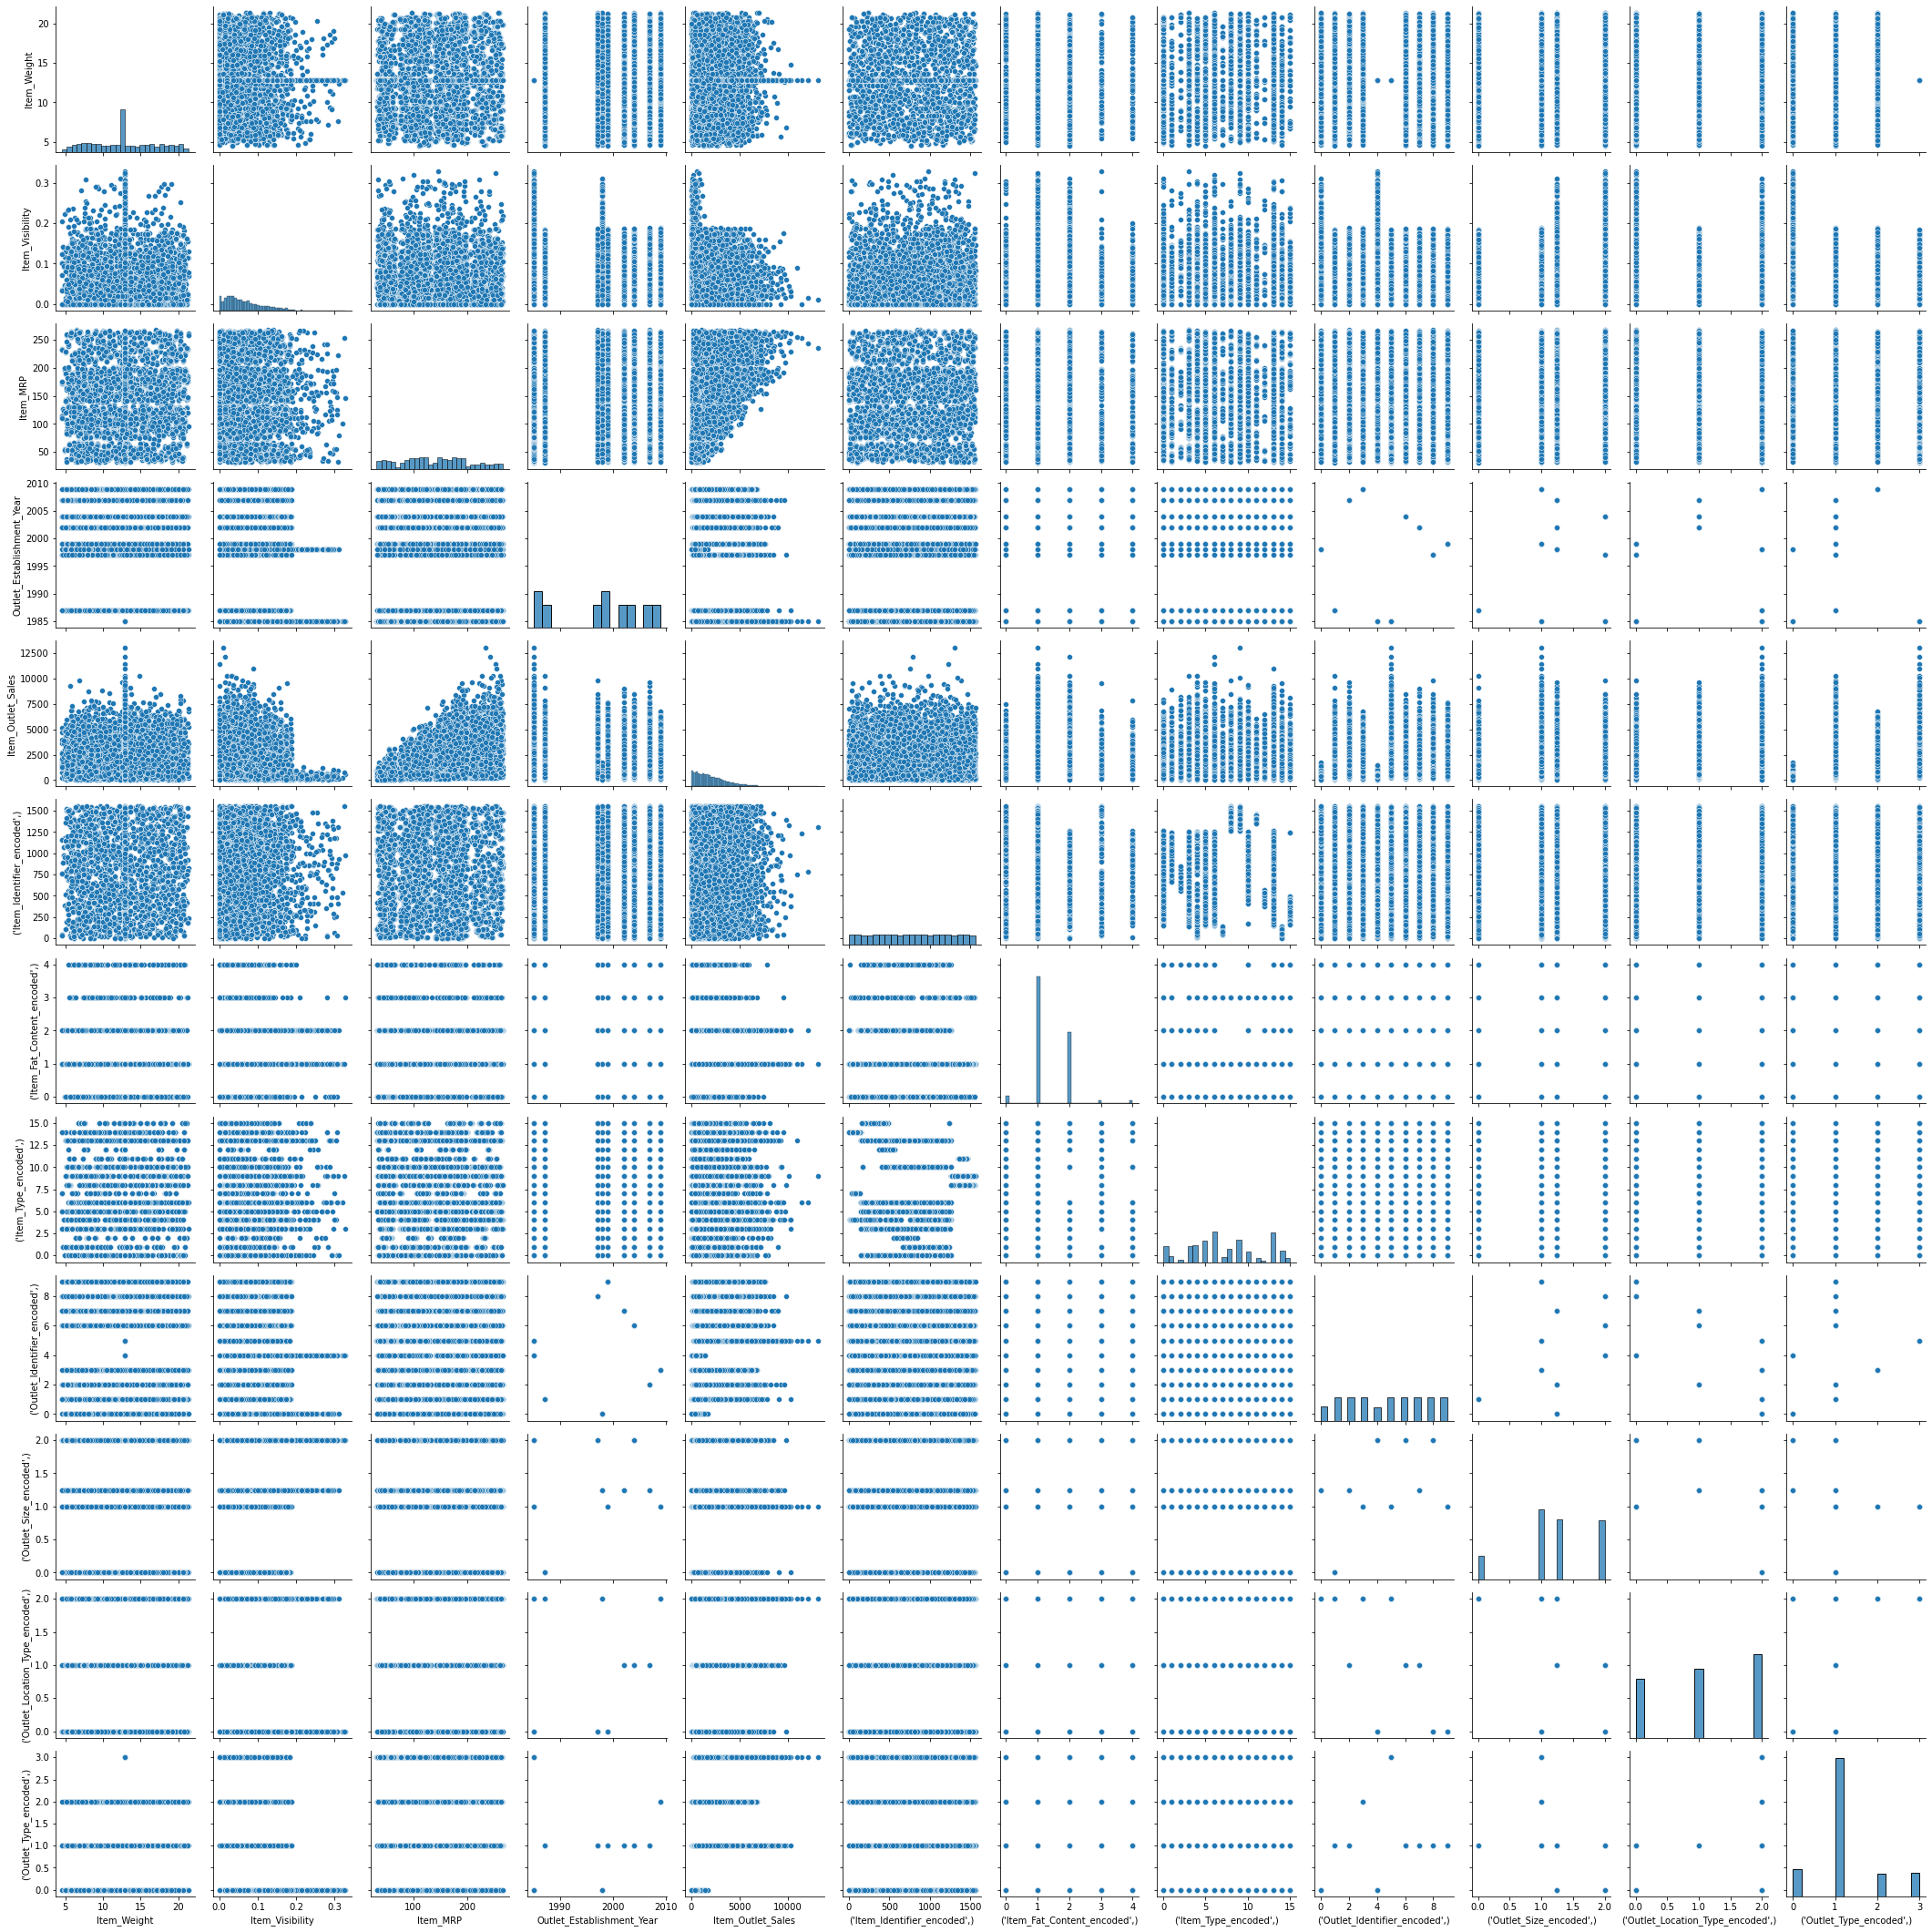

In [22]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data)

In [23]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,0.044518,-0.017331,0.028015,-0.007975,-0.009479,0.004088,-0.000566
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,-0.025482,0.034042,-0.035249,-0.100439,0.079563,-0.028099,-0.173468
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,0.012853,-0.000876,0.032651,0.003319,0.004931,0.000232,-0.001975
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-0.012772,-0.000189,0.004970,0.079035,0.266949,-0.089216,-0.122304
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.002869,0.009800,0.017048,0.162325,-0.111559,0.089367,0.401522
"(Item_Identifier_encoded,)",0.044518,-0.025482,0.012853,-0.012772,0.002869,1.000000,-0.098114,-0.017973,-0.008602,0.001414,0.003656,-0.001178
"(Item_Fat_Content_encoded,)",-0.017331,0.034042,-0.000876,-0.000189,0.009800,-0.098114,1.000000,-0.115958,-0.002357,-0.011752,-0.004102,-0.004214
"(Item_Type_encoded,)",0.028015,-0.035249,0.032651,0.004970,0.017048,-0.017973,-0.115958,1.000000,0.001656,-0.001500,0.003084,0.003053
"(Outlet_Identifier_encoded,)",-0.007975,-0.100439,0.003319,0.079035,0.162325,-0.008602,-0.002357,0.001656,1.000000,0.462395,-0.716176,0.099873
"(Outlet_Size_encoded,)",-0.009479,0.079563,0.004931,0.266949,-0.111559,0.001414,-0.011752,-0.001500,0.462395,1.000000,-0.607884,-0.266561


In [126]:
data.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility                   -0.128625
(Outlet_Size_encoded,)            -0.111559
Outlet_Establishment_Year         -0.049135
(Item_Identifier_encoded,)         0.002869
(Item_Fat_Content_encoded,)        0.009800
Item_Weight                        0.011550
(Item_Type_encoded,)               0.017048
(Outlet_Location_Type_encoded,)    0.089367
(Outlet_Identifier_encoded,)       0.162325
(Outlet_Type_encoded,)             0.401522
Item_MRP                           0.567574
Item_Outlet_Sales                  1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

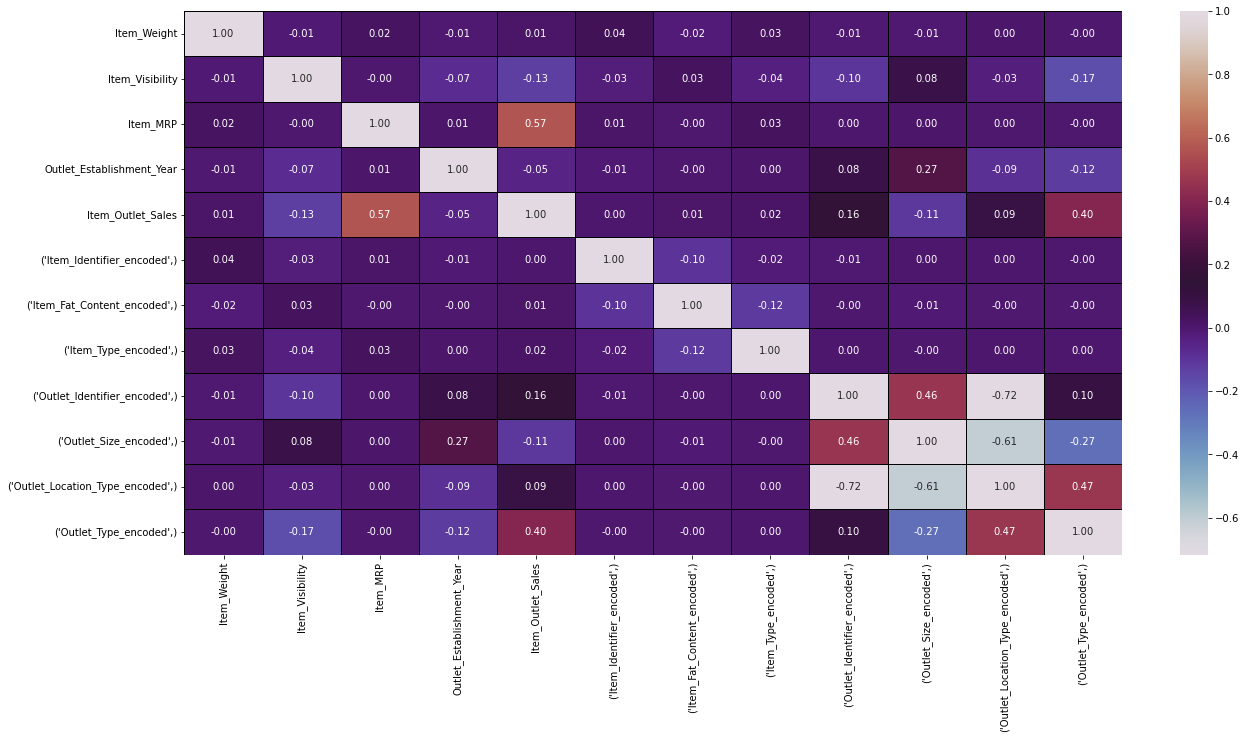

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='twilight')

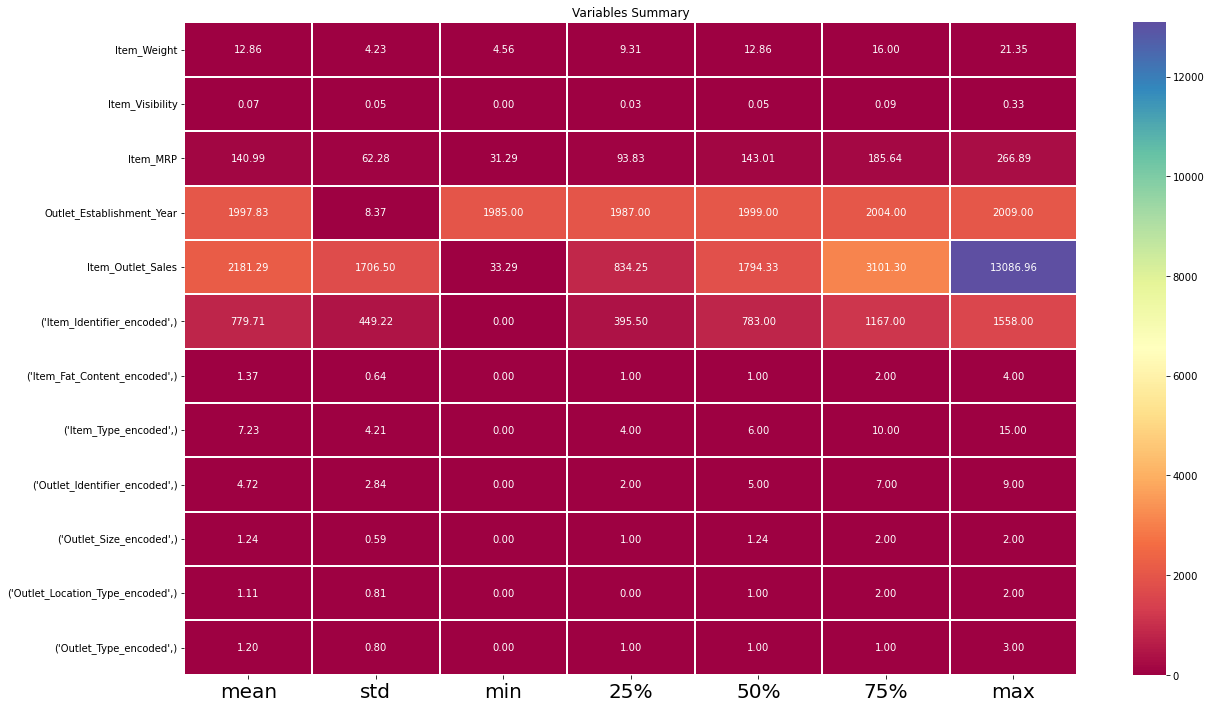

In [26]:
import numpy as np
mask = np.zeros_like(round(data.describe()[1:].transpose(),2))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,12))
sns.heatmap(round(data.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='.2f', square=False, cmap="Spectral")
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title('Variables Summary')
plt.savefig('heatmap.png')
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   (Item_Identifier_encoded,)       8523 non-null   float64
 6   (Item_Fat_Content_encoded,)      8523 non-null   float64
 7   (Item_Type_encoded,)             8523 non-null   float64
 8   (Outlet_Identifier_encoded,)     8523 non-null   float64
 9   (Outlet_Size_encoded,)           8523 non-null   float64
 10  (Outlet_Location_Type_encoded,)  8523 non-null   float64
 11  (Outlet_Type_encoded,)           8523 non-null   float64
dtypes: float64(11), int6

In [28]:
data.select_dtypes(include = [np.number]).columns

Index([                    'Item_Weight',                 'Item_Visibility',
                              'Item_MRP',       'Outlet_Establishment_Year',
                     'Item_Outlet_Sales',      ('Item_Identifier_encoded',),
           ('Item_Fat_Content_encoded',),            ('Item_Type_encoded',),
          ('Outlet_Identifier_encoded',),          ('Outlet_Size_encoded',),
       ('Outlet_Location_Type_encoded',),          ('Outlet_Type_encoded',)],
      dtype='object')

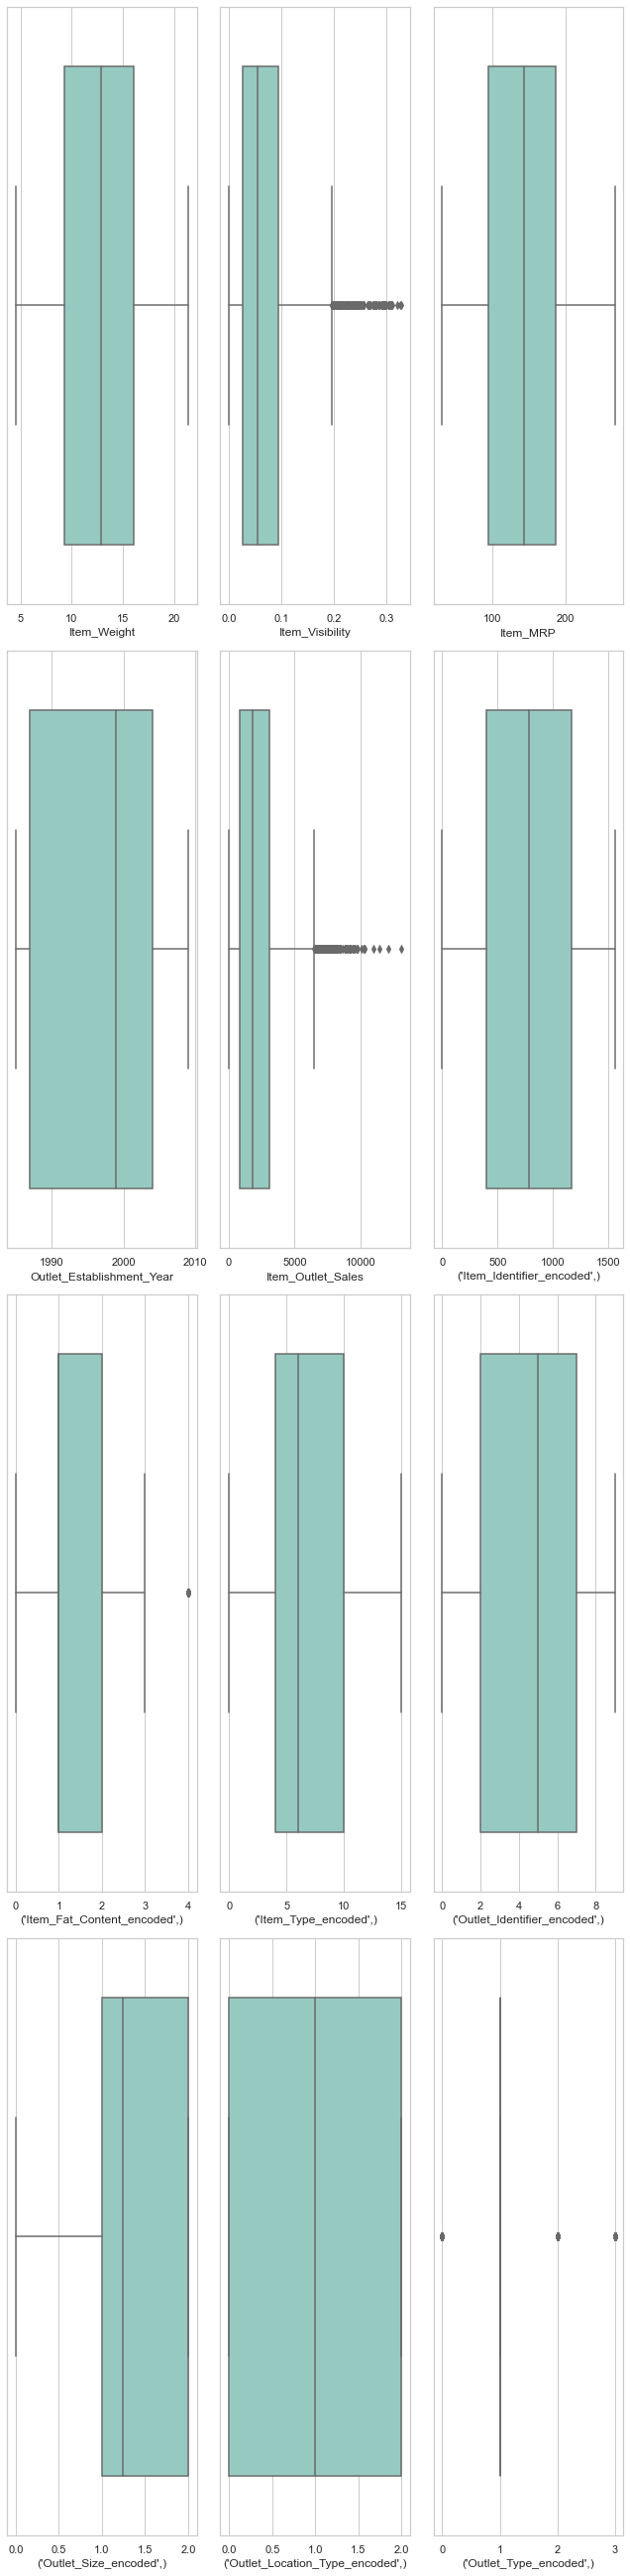

In [29]:
import warnings
warnings.filterwarnings('ignore')
colist=data.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    sns.set_theme(style='whitegrid')
    plt.subplot(nrows, ncol, x+1)
    sns.boxplot(data[colist[x]], color='Black', palette='Set3')
    plt.tight_layout()

In [127]:
data.skew().sort_values()

(Outlet_Size_encoded,)            -0.427783
Outlet_Establishment_Year         -0.396641
(Outlet_Location_Type_encoded,)   -0.209093
(Outlet_Identifier_encoded,)      -0.059861
(Item_Identifier_encoded,)        -0.008877
Item_Weight                        0.090561
(Item_Type_encoded,)               0.101655
Item_MRP                           0.127202
(Outlet_Type_encoded,)             0.927438
(Item_Fat_Content_encoded,)        0.994824
Item_Visibility                    1.167091
Item_Outlet_Sales                  1.177531
dtype: float64

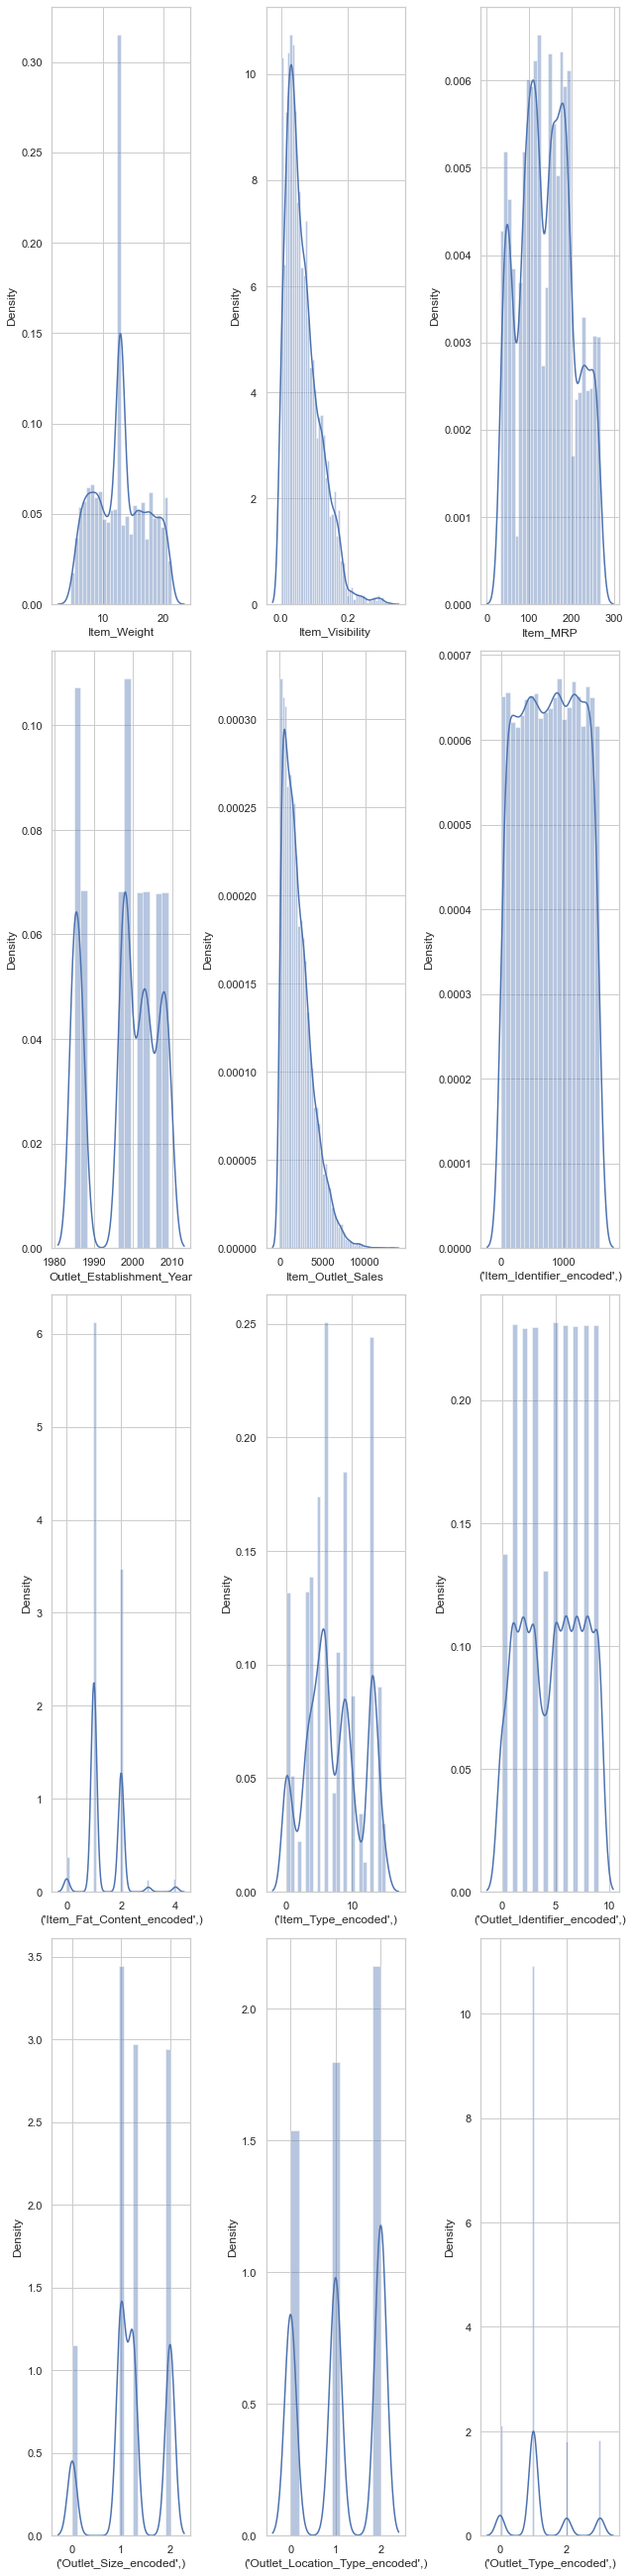

In [31]:
colist=data.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    sns.set_theme(style='whitegrid')
    plt.subplot(nrows, ncol, x+1)
    sns.distplot(data[colist[x]])
    plt.tight_layout()

# Observations
1. Item MRP is the only strong correlated feature with lable 
2. There is negative to strong positive relationg between features and label.
3. Features having strong positive and positive correlation with label are:
(Item_Identifier_encoded,)         0.002869                                                                                 
(Item_Fat_Content_encoded,)        0.009800                                                                                 
Item_Weight                        0.011550                                                                                 
(Item_Type_encoded,)               0.017048                                                                                 
(Outlet_Location_Type_encoded,)    0.089367                                                                                 
(Outlet_Identifier_encoded,)       0.162325                                                                                 
(Outlet_Type_encoded,)             0.401522                                                                                 
Item_MRP                           0.567574                                                                                 
4. Features having strong negative and negative correlation are:                                                           
Item_Visibility                   -0.128625                                                                                 
(Outlet_Size_encoded,)            -0.111559                                                                                 
Outlet_Establishment_Year         -0.049135                                                                                 
5. Correlation of feature with itself is of no  relevance.
6. Left Skewness is found in:
(Outlet_Size_encoded,)            -0.427783                                                                                 
Outlet_Establishment_Year         -0.396641                                                                                 
(Outlet_Location_Type_encoded,)   -0.209093                                                                                 
(Outlet_Identifier_encoded,)      -0.059861                                                                                 
(Item_Identifier_encoded,)        -0.008877                                                                                 
7. Right Skewness is found in:                                                                                             
Item_Weight                        0.090561                                                                                 
(Item_Type_encoded,)               0.101655                                                                                 
Item_MRP                           0.127202                                                                                 
(Outlet_Type_encoded,)             0.927438                                                                                 
(Item_Fat_Content_encoded,)        0.994824                                                                                 
Item_Visibility                    1.167091                                                                                 
Item_Outlet_Sales                  1.177531                                                                                 
8. High number of outliers can be noticed in Item Visibility and Item Outlet Sales.

# Z Score: Outliers Treatment

In [32]:
import numpy as np
from scipy.stats import stats
score=np.abs(stats.zscore(data))
score.shape

(8523, 12)

In [33]:
#threshold=(-3,3)
threshold=3
print(np.where(score>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [34]:
data.iloc[4]

Item_Weight                           8.9300
Item_Visibility                       0.0000
Item_MRP                             53.8614
Outlet_Establishment_Year          1987.0000
Item_Outlet_Sales                   994.7052
(Item_Identifier_encoded,)         1297.0000
(Item_Fat_Content_encoded,)           1.0000
(Item_Type_encoded,)                  9.0000
(Outlet_Identifier_encoded,)          1.0000
(Outlet_Size_encoded,)                0.0000
(Outlet_Location_Type_encoded,)       2.0000
(Outlet_Type_encoded,)                1.0000
Name: 4, dtype: float64

In [35]:
len(np.where(score>3)[0])

302

In [36]:
data_new=data[(score<3).all(axis=1)]
data_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,9.300,0.016047,249.8092,1999,3735.1380,156.0,1.0,4.0,9.0,1.000000,0.0,1.0
1,5.920,0.019278,48.2692,2009,443.4228,8.0,2.0,14.0,3.0,1.000000,2.0,2.0
2,17.500,0.016760,141.6180,1999,2097.2700,662.0,1.0,10.0,9.0,1.000000,0.0,1.0
3,19.200,0.000000,182.0950,1998,732.3800,1121.0,2.0,6.0,0.0,1.238181,2.0,0.0
4,8.930,0.000000,53.8614,1987,994.7052,1297.0,1.0,9.0,1.0,0.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370.0,1.0,13.0,1.0,0.000000,2.0,1.0
8519,8.380,0.046982,108.1570,2002,549.2850,897.0,2.0,0.0,7.0,1.238181,1.0,1.0
8520,10.600,0.035186,85.1224,2004,1193.1136,1357.0,1.0,8.0,6.0,2.000000,1.0,1.0
8521,7.210,0.145221,103.1332,2009,1845.5976,681.0,2.0,13.0,3.0,1.000000,2.0,2.0


# In this section, I have identified outliers in 8523 rows and removed those from the dataset, to make more precise prediction.

# Vectorization

In [37]:
x=data_new.drop('Item_Outlet_Sales', axis=1)
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,9.300,0.016047,249.8092,1999,156.0,1.0,4.0,9.0,1.000000,0.0,1.0
1,5.920,0.019278,48.2692,2009,8.0,2.0,14.0,3.0,1.000000,2.0,2.0
2,17.500,0.016760,141.6180,1999,662.0,1.0,10.0,9.0,1.000000,0.0,1.0
3,19.200,0.000000,182.0950,1998,1121.0,2.0,6.0,0.0,1.238181,2.0,0.0
4,8.930,0.000000,53.8614,1987,1297.0,1.0,9.0,1.0,0.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,370.0,1.0,13.0,1.0,0.000000,2.0,1.0
8519,8.380,0.046982,108.1570,2002,897.0,2.0,0.0,7.0,1.238181,1.0,1.0
8520,10.600,0.035186,85.1224,2004,1357.0,1.0,8.0,6.0,2.000000,1.0,1.0
8521,7.210,0.145221,103.1332,2009,681.0,2.0,13.0,3.0,1.000000,2.0,2.0


In [38]:
y=data_new['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

# I have removed Item Outlet Sales from the data and parsed all other features in  x vector, I have parsed Item Outlet Sales in y vector.

# MinMax Scaler Transformation And Variance Inflation Factor

In [39]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,779.714889,1.369354,7.226681,4.722281,1.238181,1.112871,1.201220
std,4.226124,0.051598,62.275067,8.371760,1706.499616,449.222377,0.644810,4.209990,2.837201,0.590666,0.812757,0.796459
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,395.500000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,783.000000,1.000000,6.000000,5.000000,1.238181,1.000000,1.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,1167.000000,2.000000,10.000000,7.000000,2.000000,2.000000,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1558.000000,4.000000,15.000000,9.000000,2.000000,2.000000,3.000000


In [40]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=MinMaxScaler([8500, 14000])
X_scaled=scaler.fit_transform(x)
X_scaled_frame=pd.DataFrame(X_scaled, columns=x.columns)
X_scaled_frame

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,10053.885085,8900.771537,13601.289313,11708.333333,9050.706033,10333.333333,9966.666667,14000.000000,11250.000000,8500.0,10333.333333
1,8947.008038,8981.461665,8896.376206,14000.000000,8528.241335,12166.666667,13633.333333,10333.333333,11250.000000,14000.0,12166.666667
2,12739.208098,8918.572633,11075.586252,11708.333333,10836.970475,10333.333333,12166.666667,14000.000000,11250.000000,8500.0,10333.333333
3,13295.921405,8500.000000,12020.514146,11479.166667,12457.317073,12166.666667,10700.000000,8500.000000,11904.997546,14000.0,8500.000000
4,9932.718071,8500.000000,9026.925056,8958.333333,13078.626444,10333.333333,11800.000000,9111.111111,8500.000000,14000.0,10333.333333
...,...,...,...,...,...,...,...,...,...,...,...
8217,9256.475141,9918.130445,12777.511647,8958.333333,9806.161746,10333.333333,13266.666667,9111.111111,8500.000000,14000.0,10333.333333
8218,9752.604942,9673.357458,10294.445548,12395.833333,11666.559692,12166.666667,8500.000000,12777.777778,11904.997546,11250.0,10333.333333
8219,10479.607026,9378.755619,9756.707176,12854.166667,13290.436457,10333.333333,11433.333333,12166.666667,14000.000000,11250.0,10333.333333
8220,9369.455195,12126.796903,10177.165889,14000.000000,10904.043646,12166.666667,13266.666667,10333.333333,11250.000000,14000.0,12166.666667


In [41]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,61.819404,Item_Weight
1,68.360016,Item_Visibility
2,56.482179,Item_MRP
3,41.488445,Outlet_Establishment_Year
4,47.675201,"(Item_Identifier_encoded,)"
5,95.461677,"(Item_Fat_Content_encoded,)"
6,50.016816,"(Item_Type_encoded,)"
7,138.764941,"(Outlet_Identifier_encoded,)"
8,83.034984,"(Outlet_Size_encoded,)"
9,113.489794,"(Outlet_Location_Type_encoded,)"


# Since, feature scaling is around 10000, I will keep accepatle Variance Inflation Factor Score of 100. Since, Outlet Location Type Encoded shows higher score than 100, I will remove that to reduce multicollinearity.

In [42]:
x=X_scaled_frame.drop(vif.iloc[9,1], axis=1)
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Type_encoded,)"
0,10053.885085,8900.771537,13601.289313,11708.333333,9050.706033,10333.333333,9966.666667,14000.000000,11250.000000,10333.333333
1,8947.008038,8981.461665,8896.376206,14000.000000,8528.241335,12166.666667,13633.333333,10333.333333,11250.000000,12166.666667
2,12739.208098,8918.572633,11075.586252,11708.333333,10836.970475,10333.333333,12166.666667,14000.000000,11250.000000,10333.333333
3,13295.921405,8500.000000,12020.514146,11479.166667,12457.317073,12166.666667,10700.000000,8500.000000,11904.997546,8500.000000
4,9932.718071,8500.000000,9026.925056,8958.333333,13078.626444,10333.333333,11800.000000,9111.111111,8500.000000,10333.333333
...,...,...,...,...,...,...,...,...,...,...
8217,9256.475141,9918.130445,12777.511647,8958.333333,9806.161746,10333.333333,13266.666667,9111.111111,8500.000000,10333.333333
8218,9752.604942,9673.357458,10294.445548,12395.833333,11666.559692,12166.666667,8500.000000,12777.777778,11904.997546,10333.333333
8219,10479.607026,9378.755619,9756.707176,12854.166667,13290.436457,10333.333333,11433.333333,12166.666667,14000.000000,10333.333333
8220,9369.455195,12126.796903,10177.165889,14000.000000,10904.043646,12166.666667,13266.666667,10333.333333,11250.000000,12166.666667


In [43]:
x.mean()

Item_Weight                     11220.076347
Item_Visibility                 10096.794673
Item_MRP                        11041.488608
Outlet_Establishment_Year       11474.121767
(Item_Identifier_encoded,)      11259.098917
(Item_Fat_Content_encoded,)     10941.620044
(Item_Type_encoded,)            11151.309495
(Outlet_Identifier_encoded,)    11402.814941
(Outlet_Size_encoded,)          11898.393859
(Outlet_Type_encoded,)          10706.600178
dtype: float64

In [44]:
X_scaled=np.array(x)

In [45]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,60.018150,Item_Weight
1,64.355969,Item_Visibility
2,54.887579,Item_MRP
3,38.889547,Outlet_Establishment_Year
4,46.078115,"(Item_Identifier_encoded,)"
5,88.245880,"(Item_Fat_Content_encoded,)"
6,48.063035,"(Item_Type_encoded,)"
7,60.539176,"(Outlet_Identifier_encoded,)"
8,80.783279,"(Outlet_Size_encoded,)"
9,54.556744,"(Outlet_Type_encoded,)"


# Now, all the features, seem to have lower multi collinearity, that is below 100. Now, I will apply p values feature selection, to deciede which features to include.

# Feature Selection

In [46]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

In [47]:
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x,y,test_size=0.60, random_state=100)

In [48]:
constant_filter=VarianceThreshold(threshold=0.04)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)

<AxesSubplot:>

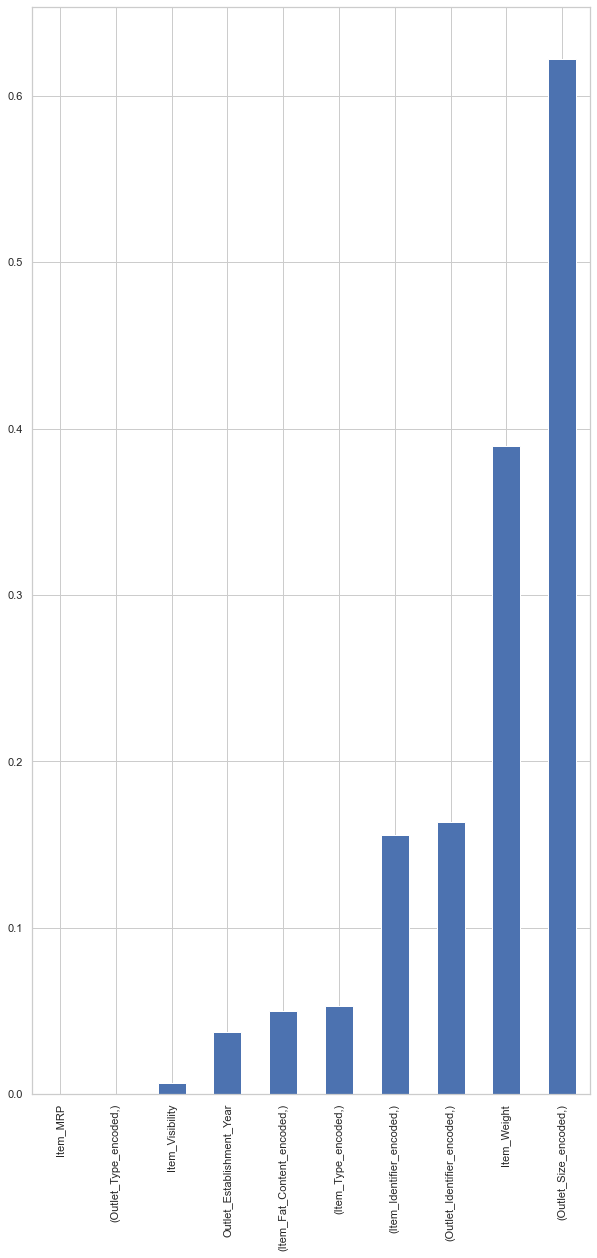

In [49]:
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))

In [50]:
p_values=p_values[p_values<0.05]
p_values.index

Index([                 'Item_MRP',    ('Outlet_Type_encoded',),
                 'Item_Visibility', 'Outlet_Establishment_Year'],
      dtype='object')

# P Values are an important component of feature selection, with significance level set to 0.05, Variance Threshold
    ensemble technique returns with 95% confidence, all the features that have maximum explanatory capacity
For the present dataset features with pvalues with less than 0.05 are:
Index(['Item_MRP', ('Outlet_Type_encoded',), 'Item_Visibility', 'Outlet_Establishment_Year'], dtype='object')

In [51]:
import numpy as np
x=x[['Item_MRP', ('Outlet_Type_encoded',), 'Item_Visibility', 'Outlet_Establishment_Year']]
x.sample()

,Item_MRP,"(Outlet_Type_encoded,)",Item_Visibility,Outlet_Establishment_Year
2452,12092.761666,10333.333333,8500.0,12854.166667


In [52]:
y.sample()

3855    4540.756
Name: Item_Outlet_Sales, dtype: float64

In [53]:
x.shape, y.shape

((8222, 4), (8222,))

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.60, random_state=100)

In [55]:
x_train.shape, y_train.shape

((3288, 4), (3288,))

# Git Test Data For Evaluation

# Out Of Sample DataSet Preparation

In [56]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
result1 = encoder.fit_transform(test_data[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])
result1

array([[1.103e+03, 1.000e+00, 1.300e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.067e+03, 4.000e+00, 4.000e+00, ...,       nan, 1.000e+00,
        1.000e+00],
       [1.406e+03, 1.000e+00, 1.100e+01, ...,       nan, 2.000e+00,
        0.000e+00],
       ...,
       [1.412e+03, 1.000e+00, 8.000e+00, ...,       nan, 1.000e+00,
        1.000e+00],
       [5.170e+02, 2.000e+00, 3.000e+00, ...,       nan, 1.000e+00,
        1.000e+00],
       [9.870e+02, 2.000e+00, 3.000e+00, ...,       nan, 1.000e+00,
        1.000e+00]])

In [57]:
len(result1)

5681

In [58]:
len(test_data)

5681

In [59]:
encoded1=test_data.select_dtypes(include = [object]).columns
encoded1

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [60]:
encoded_data1=pd.DataFrame(data=result1, columns=[encoded+'_encoded'])
encoded_data1

,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,1103.0,1.0,13.0,9.0,1.0,0.0,1.0
1,1067.0,4.0,4.0,2.0,NaN,1.0,1.0
2,1406.0,1.0,11.0,0.0,NaN,2.0,0.0
3,809.0,1.0,13.0,2.0,NaN,1.0,1.0
4,1184.0,2.0,4.0,5.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...
5676,231.0,2.0,13.0,8.0,2.0,0.0,1.0
5677,306.0,2.0,15.0,3.0,1.0,2.0,2.0
5678,1412.0,1.0,8.0,7.0,NaN,1.0,1.0
5679,517.0,2.0,3.0,2.0,NaN,1.0,1.0


In [61]:
new_data1=pd.concat([test_data, encoded_data1], axis=1, ignore_index=False)
new_data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1103.0,1.0,13.0,9.0,1.0,0.0,1.0
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1067.0,4.0,4.0,2.0,NaN,1.0,1.0
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1406.0,1.0,11.0,0.0,NaN,2.0,0.0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,809.0,1.0,13.0,2.0,NaN,1.0,1.0
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1184.0,2.0,4.0,5.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,231.0,2.0,13.0,8.0,2.0,0.0,1.0
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,306.0,2.0,15.0,3.0,1.0,2.0,2.0
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1412.0,1.0,8.0,7.0,NaN,1.0,1.0
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,517.0,2.0,3.0,2.0,NaN,1.0,1.0


In [62]:
test_data=new_data1.drop(encoded1, axis=1)
test_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,"(Item_Identifier_encoded,)","(Item_Fat_Content_encoded,)","(Item_Type_encoded,)","(Outlet_Identifier_encoded,)","(Outlet_Size_encoded,)","(Outlet_Location_Type_encoded,)","(Outlet_Type_encoded,)"
0,20.750,0.007565,107.8622,1999,1103.0,1.0,13.0,9.0,1.0,0.0,1.0
1,8.300,0.038428,87.3198,2007,1067.0,4.0,4.0,2.0,NaN,1.0,1.0
2,14.600,0.099575,241.7538,1998,1406.0,1.0,11.0,0.0,NaN,2.0,0.0
3,7.315,0.015388,155.0340,2007,809.0,1.0,13.0,2.0,NaN,1.0,1.0
4,NaN,0.118599,234.2300,1985,1184.0,2.0,4.0,5.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,1997,231.0,2.0,13.0,8.0,2.0,0.0,1.0
5677,7.600,0.142991,169.1448,2009,306.0,2.0,15.0,3.0,1.0,2.0,2.0
5678,10.000,0.073529,118.7440,2002,1412.0,1.0,8.0,7.0,NaN,1.0,1.0
5679,15.300,0.000000,214.6218,2007,517.0,2.0,3.0,2.0,NaN,1.0,1.0


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      4705 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Establishment_Year        5681 non-null   int64  
 4   (Item_Identifier_encoded,)       5681 non-null   float64
 5   (Item_Fat_Content_encoded,)      5681 non-null   float64
 6   (Item_Type_encoded,)             5681 non-null   float64
 7   (Outlet_Identifier_encoded,)     5681 non-null   float64
 8   (Outlet_Size_encoded,)           4075 non-null   float64
 9   (Outlet_Location_Type_encoded,)  5681 non-null   float64
 10  (Outlet_Type_encoded,)           5681 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 488.3 KB


In [68]:
test_data=test_data.fillna(test_data.mean())

In [74]:
X=test_data[['Item_MRP', ('Outlet_Type_encoded',),'Item_Visibility', 'Outlet_Establishment_Year']]
X.sample()

,Item_MRP,"(Outlet_Type_encoded,)",Item_Visibility,Outlet_Establishment_Year
1087,78.3302,1.0,0.025916,2004


In [76]:
scaler=MinMaxScaler([8500, 14000])
X_scaled1=scaler.fit_transform(X)
X_scaled_frame1=pd.DataFrame(X_scaled1, columns=X.columns)
X_scaled_frame1

,Item_MRP,"(Outlet_Type_encoded,)",Item_Visibility,Outlet_Establishment_Year
0,10278.772148,10333.333333,8628.559363,11708.333333
1,9797.169546,10333.333333,9153.052845,13541.666667
2,13417.769686,8500.000000,10192.209418,11479.166667
3,11384.682930,10333.333333,8761.515517,13541.666667
4,13241.379310,14000.000000,10515.516561,8500.000000
...,...,...,...,...
5676,11063.059680,10333.333333,8729.363475,11250.000000
5677,11715.501043,12166.666667,10930.035295,14000.000000
5678,10533.888552,10333.333333,9749.569052,12395.833333
5679,12781.678392,10333.333333,8500.000000,13541.666667


# Model Development, Evaluation And Saving

# Model 1

# Random Forest Regressor With Grid Search CV Hyper Parameter Tuning

In [78]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
import pickle
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'criterion' : ['squared_error','absolute_error', 'poisson'],
 'bootstrap': [True],
 'oob_score':[True],
 'n_jobs':[-1],
 'warm_start':[True]
}
score2 = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
mse2 = mean_squared_error(y_pred2,y_train)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
rmse2=np.sqrt(mse2)
ytst_pred2=best_estim.predict(x_test)
out_of_sample_pred=best_estim.predict(X_scaled_frame1)
mse_test2=mean_squared_error(ytst_pred2,y_test)
rmse_test2=np.sqrt(mse_test2)
model3_save=pickle.dumps(best_estim)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2})
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2})
model3_prediction_out_of_sample=pd.DataFrame({'Out Of Sample Prediction':out_of_sample_pred})
model3_prediction_out_of_sample

,Out Of Sample Prediction
0,1512.218224
1,1536.646426
2,399.173732
3,2799.482602
4,5078.655820
...,...
5676,2168.627115
5677,1501.365684
5678,1640.544516
5679,4201.224632


In [79]:
print('Train Score: ',model3_train_score)
print('Test Score: ',model3_test_score)
print('MSE Train: ',mse2)
print('RMSE Train: ',rmse2)
print('MSE Test: ',mse_test2)
print('RMSE Train: ',rmse_test2)

Train Score:  0.9303810492004521
Test Score:  0.5288772411917866
MSE Train:  174529.2091268689
RMSE Train:  417.7669315861045
MSE Test:  1176946.2798051103
RMSE Train:  1084.8715499104537


# Model 2

# Random Forest Regressor With Default Hyper Parameter Tuning

In [81]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
rfc=el()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
print(scores.std())
print(cv_scores)
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
out_of_sample_pred=rfc.predict(X_scaled_frame1)

0.9333621993330898
0.5172138296262971
0.010643313390686695
0.5206827556916263


In [82]:
model3_save=pickle.dumps(rfc)

In [83]:
out_of_sample_pred=pd.DataFrame({'Out Of Sample Prediction':out_of_sample_pred})
out_of_sample_pred

,Out Of Sample Prediction
0,1367.340144
1,1581.807640
2,325.915758
3,3060.549440
4,5168.379028
...,...
5676,2021.854834
5677,1360.968438
5678,1567.925710
5679,4199.746556


# Model 3

# Ada Boost Regressor And Random Forest Regressor With Grid Search CV Hyper Parameter Tuning and Ada Boost Boosting

In [84]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [85]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostRegressor(base_estimator=rfc, learning_rate=1.0,loss='linear', n_estimators=50, random_state=None), n_jobs=1, param_grid={'n_estimators': [50, 100],'learning_rate': [0.01, 0.05, 0.1, 0.5],'loss': ['linear', 'square', 'exponential']},pre_dispatch='2*n_jobs', refit=True, return_train_score=True,scoring=None, verbose=0) 

GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor()),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [86]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.5575759006981456


In [87]:
best_estim=gridsearch.best_estimator_
print(best_estim)

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100)


In [88]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
ytst_pred=best_estim.predict(x_test)
out_of_sample_pred=best_estim.predict(X_scaled_frame1)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))

Train Score:  0.5743271143243958
Test score:  0.5575512013553604


In [89]:
ytst_pred=best_estim.predict(x_test)
print('mse_train', mse)
print('rmse_train', np.sqrt(mse))
mse_test = mean_squared_error(ytst_pred,y_test)
print('mse_test', mse_test)
print('rmse_test', np.sqrt(mse_test))

mse_train 1067128.2923757837
rmse_train 1033.019018399847
mse_test 1105313.759170427
rmse_test 1051.3390315071665


In [90]:
out_of_sample_pred=pd.DataFrame({'Out Of Sample Prediction': out_of_sample_pred})
out_of_sample_pred

,Out Of Sample Prediction
0,1778.441522
1,1470.005263
2,566.176057
3,2770.666836
4,4484.014809
...,...
5676,2163.185545
5677,3038.103274
5678,1934.275478
5679,3635.284259


In [91]:
model3_save=pickle.dumps(abreg)

# Model 4

# Extra Trees Regressor With Grid Search CV Hyper Parameter Tuning

In [92]:
abreg = sklearn.ensemble.ExtraTreesRegressor()
params = {
 'n_estimators': [50, 100],
 'max_samples' : [0.01, 0.05, 0.1, 0.5],
 'bootstrap' : [True],
 'oob_score' : [True],
 'warm_start' : [True],
 'n_jobs'  : [-1],
 'random_state' : [0,10,100,1000,10000,100000,100000],
 'criterion' : ['squared_error', 'absolute_error'] 
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [93]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_samples': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100], 'n_jobs': [-1],
                         'oob_score': [True],
                         'random_state': [0, 10, 100, 1000, 10000, 100000,
                                          100000],
                         'warm_start': [True]},
             return_train_score=True)

In [94]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_samples': 0.05, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 10, 'warm_start': True}
0.5862994358717788


In [95]:
best_estim=gridsearch.best_estimator_
print(best_estim)

ExtraTreesRegressor(bootstrap=True, max_samples=0.05, n_jobs=-1, oob_score=True,
                    random_state=10, warm_start=True)


In [96]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
yts_pred=best_estim.predict(x_test)
out_of_sample_pred=best_estim.predict(X_scaled_frame1)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(yts_pred,y_test)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  0.6277658213496256
Test score:  0.5819561701764691
mse_train:  933161.6760053405
rmse_train 966.0029378864955
mse_train:  1044345.9185689156
rmse_train 1021.9324432509791


In [97]:
model3_save=pickle.dumps(abreg)

In [98]:
out_of_sample_pred=pd.DataFrame({'Out Of Sample Prediction':out_of_sample_pred})
out_of_sample_pred

,Out Of Sample Prediction
0,1731.033394
1,1424.831974
2,709.969172
3,2671.116362
4,4870.693190
...,...
5676,2291.850050
5677,2377.691644
5678,1847.435208
5679,4061.446580


# Model5

# Linear Regression With Intuitional Hyper Parameter Tuning

In [99]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True,n_jobs=-1, positive=True)
lm.fit(x_train, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [100]:
lm.score(x_train, y_train)

0.46150426547289425

In [101]:
lm.score(x_test, y_test)

0.47343436067817146

In [102]:
ytr_pred=lm.predict(x_train)
yts_pred=lm.predict(x_test)
out_of_sample_pred=lm.predict(X_scaled_frame1)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', lm.score(x_train, y_train))
print('Test score: ', lm.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(yts_pred,y_test)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  0.46150426547289425
Test score:  0.47343436067817146
mse_train:  1349966.2604196905
rmse_train 1161.8804845678794
mse_train:  1315452.2015467132
rmse_train 1146.931646414342


In [103]:
out_of_sample_pred=pd.DataFrame({'Out Of Sample Prediction':out_of_sample_pred})
out_of_sample_pred

,Out Of Sample Prediction
0,1525.607978
1,1246.633617
2,2760.201088
3,2250.845538
4,4850.396118
...,...
5676,2015.305899
5677,3214.359681
5678,1696.613945
5679,3134.541707


In [104]:
model3_save=pickle.dumps(lm)

# All the models have been saved in pickle

# Conclusion
The best model with right fit is:                                                                                           
Extra Trees Regressor With Grid Search CV Hyper Parameter Tuning                                                            
Train Score:  0.6277658213496256,                                                                                           
Test score:  0.5819561701764691,                                                                                           
mse_train:  933161.6760053405,                                                                                             
rmse_train 966.0029378864955,                                                                                               
mse_train:  1044345.9185689156,                                                                                             
rmse_train 1021.9324432509791.      

# Credits:
DataTrained and Python Documentations.